# Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Importing and Combining NO2 Data

In [2]:
no2_2015 = pd.read_csv("no2_2015.csv")
no2_2016 = pd.read_csv("no2_2016.csv")
no2_2017 = pd.read_csv("no2_2017.csv")
no2_2018 = pd.read_csv("no2_2018.csv")
no2_2019 = pd.read_csv("no2_2019.csv")
no2_2020 = pd.read_csv("no2_2020.csv")
no2_2021 = pd.read_csv("no2_2021.csv")
no2_2022 = pd.read_csv("no2_2022.csv")
no2_2023 = pd.read_csv("no2_2023.csv")
no2_2024 = pd.read_csv("no2_2024.csv")

In [3]:
no2_data = pd.concat([no2_2015, no2_2016, no2_2017, no2_2018, no2_2019, no2_2020, no2_2021, no2_2022, no2_2023, no2_2024], ignore_index=True)

In [4]:
no2_data.to_csv("no2_data.csv")

In [6]:
no2_data.isna().sum()

Date                                  0
Source                                0
Site ID                               0
POC                                   0
Daily Max 1-hour NO2 Concentration    0
Units                                 0
Daily AQI Value                       0
Local Site Name                       0
Daily Obs Count                       0
Percent Complete                      0
AQS Parameter Code                    0
AQS Parameter Description             0
Method Code                           0
CBSA Code                             0
CBSA Name                             0
State FIPS Code                       0
State                                 0
County FIPS Code                      0
County                                0
Site Latitude                         0
Site Longitude                        0
dtype: int64

Monthly Average AQI for Santa Clara County vs Butte County

/var/folders/vv/2tyv9bm12sz47cjgm0593wqc0000gn/T/ipykernel_58355/1644217533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  butte["Date"]=pd.to_datetime(butte["Date"])
/var/folders/vv/2tyv9bm12sz47cjgm0593wqc0000gn/T/ipykernel_58355/1644217533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc["Date"]=pd.to_datetime(sc["Date"])


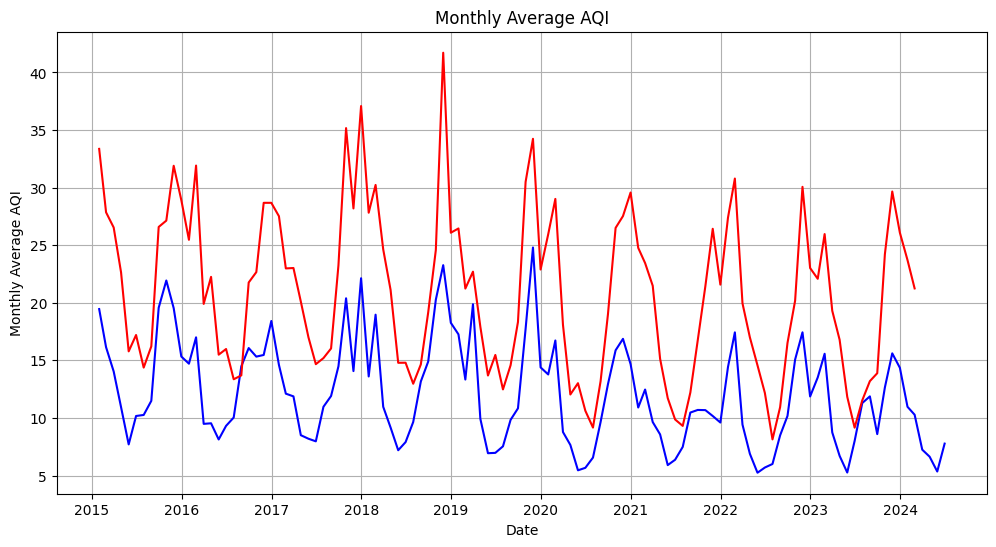

In [5]:
butte = no2_data[no2_data["County"] == "Butte"]
sc = no2_data[no2_data["County"] == "Santa Clara"]

butte["Date"]=pd.to_datetime(butte["Date"])
sc["Date"]=pd.to_datetime(sc["Date"])

butte.set_index('Date', inplace=True)
sc.set_index('Date', inplace=True)

# Calculate the monthly average of 'Daily AQI Value'
monthly_avg_butte = butte.resample('ME')['Daily AQI Value'].mean().reset_index()
monthly_avg_sc = sc.resample('ME')['Daily AQI Value'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_butte['Date'], monthly_avg_butte['Daily AQI Value'], color="blue")
plt.plot(monthly_avg_sc['Date'], monthly_avg_sc['Daily AQI Value'], color="red")
plt.xlabel('Date')
plt.ylabel('Monthly Average AQI')
plt.title('Monthly Average AQI')
plt.grid(True)
plt.show()

In [4]:
full_df = pd.read_csv("full_df.csv")

Average Monthly AQI for All of California

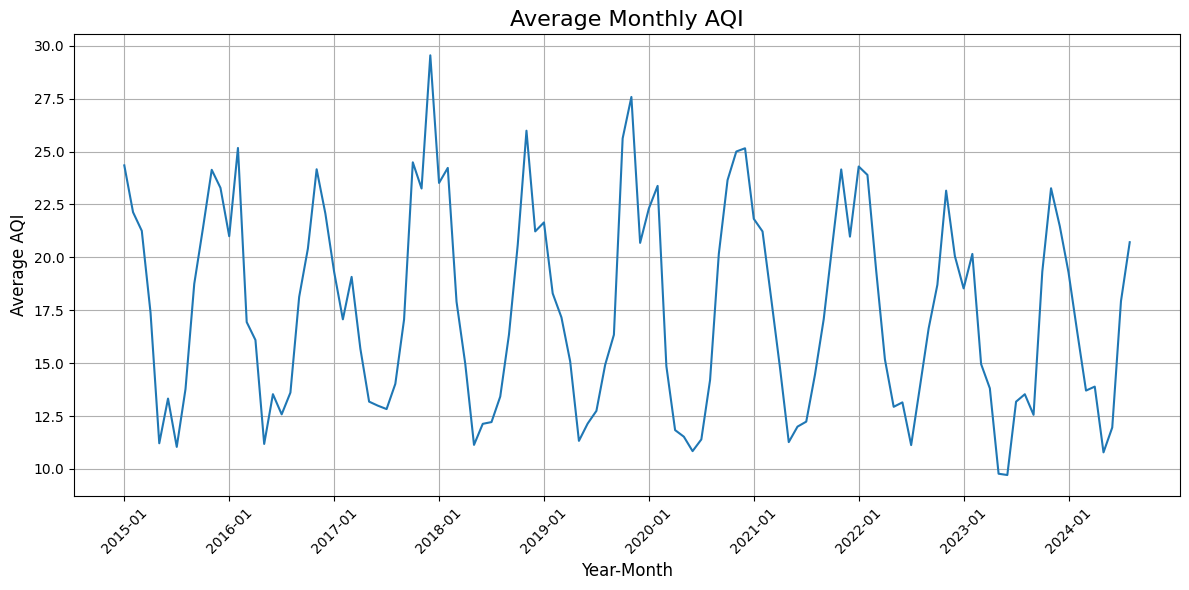

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the Date column to datetime
no2_data['Date'] = pd.to_datetime(no2_data['Date'], format='%m/%d/%Y')

# Extract year and month from the Date column
no2_data['YearMonth'] = no2_data['Date'].dt.to_period('M')

# Calculate the average AQI for each month
monthly_avg_aqi = no2_data.groupby('YearMonth')['Daily AQI Value'].mean().reset_index()

# Plot the average monthly AQI
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_aqi['YearMonth'].astype(str), monthly_avg_aqi['Daily AQI Value'])
plt.title('Average Monthly AQI', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)

# Adjust x-axis ticks to show fewer labels
x_labels = monthly_avg_aqi['YearMonth'].astype(str)
step = 12
plt.xticks(range(0, len(x_labels), step), x_labels[::step], rotation=45, fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()


Average Monthly NO2 for All of California

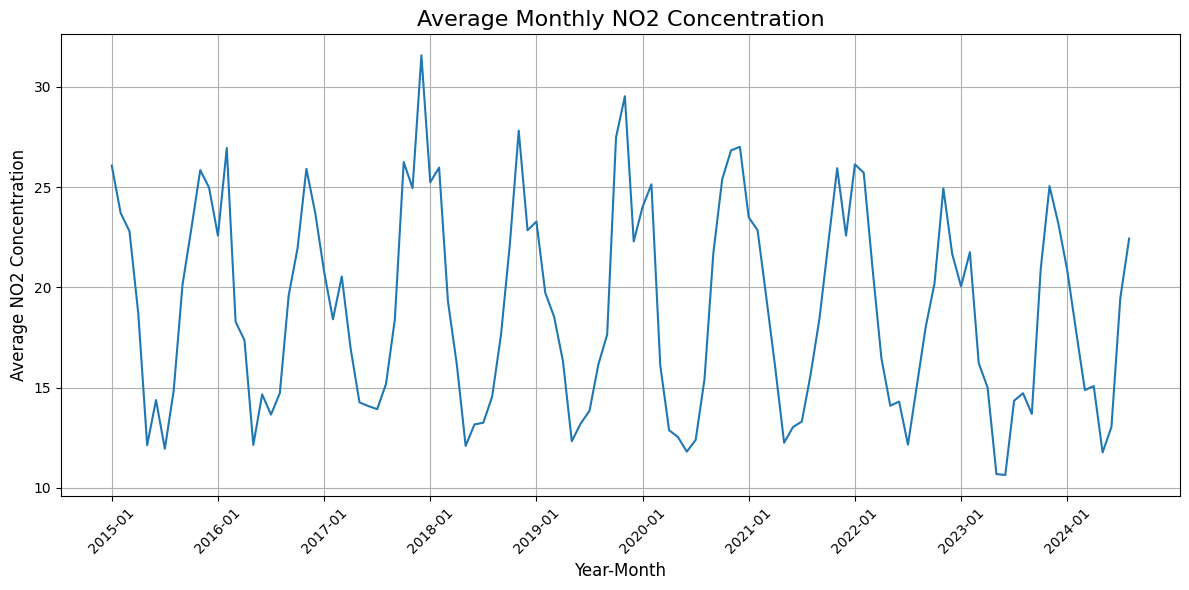

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the Date column to datetime
no2_data['Date'] = pd.to_datetime(no2_data['Date'], format='%m/%d/%Y')

# Extract year and month from the Date column
no2_data['YearMonth'] = no2_data['Date'].dt.to_period('M')

# Calculate the average AQI for each month
monthly_avg_no2 = no2_data.groupby('YearMonth')['Daily Max 1-hour NO2 Concentration'].mean().reset_index()

# Plot the average monthly AQI
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_no2['YearMonth'].astype(str), monthly_avg_no2['Daily Max 1-hour NO2 Concentration'])
plt.title('Average Monthly NO2 Concentration', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average NO2 Concentration', fontsize=12)

# Adjust x-axis ticks to show fewer labels
x_labels = monthly_avg_aqi['YearMonth'].astype(str)
step = 12
plt.xticks(range(0, len(x_labels), step), x_labels[::step], rotation=45, fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()

Heatmap of Average AQI by County

<Figure size 1200x800 with 0 Axes>

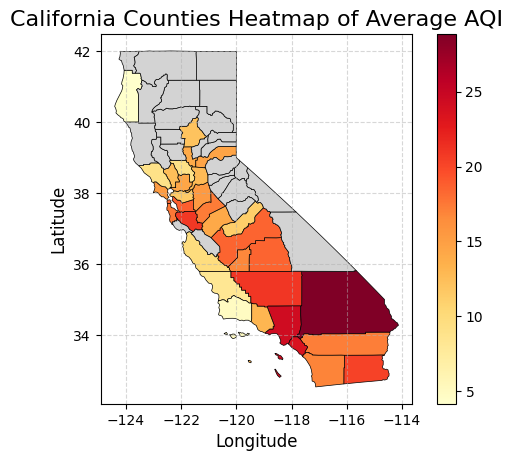

In [11]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the GeoJSON file
geojson_path = 'california-counties_780.geojson'
california_geojson = gpd.read_file(geojson_path)

# Fix any invalid geometries
california_geojson['geometry'] = california_geojson['geometry'].apply(
    lambda geom: geom if geom.is_valid else geom.buffer(0))

# Load the AQI dataset
file_path = 'no2_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Group by County and calculate the average AQI
county_aqi = data.groupby('County')['Daily AQI Value'].mean().reset_index()
county_aqi.columns = ['NAME', 'Average AQI']  # Rename to match GeoJSON's 'NAME' column

# Merge GeoJSON with AQI data using the 'NAME' column
merged_geo = california_geojson.merge(county_aqi, on='NAME', how='left')

# Plot the heatmap with a sequential colormap
plt.figure(figsize=(12, 8))
merged_geo.plot(
    column='Average AQI',
    cmap='YlOrRd',  # Sequential colormap for AQI values
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={"color": "lightgrey", "label": "No Data"}
)
plt.title('California Counties Heatmap of Average AQI', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



Heatmap of Average NO2 Concentration by County

<Figure size 1200x800 with 0 Axes>

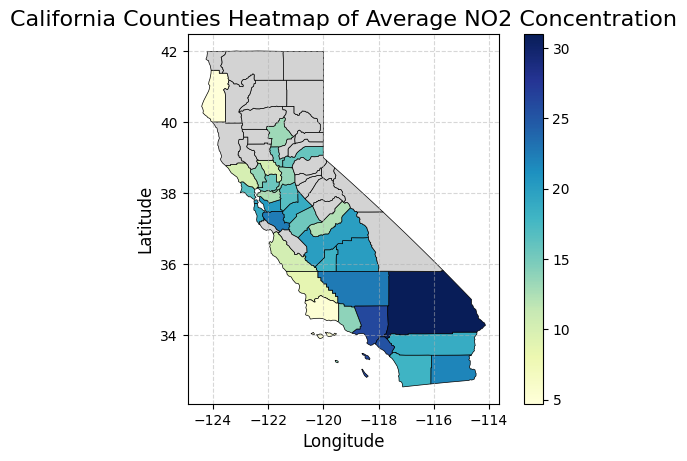

In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the GeoJSON file
geojson_path = 'california-counties_780.geojson'
california_geojson = gpd.read_file(geojson_path)

# Fix any invalid geometries
california_geojson['geometry'] = california_geojson['geometry'].apply(
    lambda geom: geom if geom.is_valid else geom.buffer(0))

# Load the AQI dataset
file_path = 'no2_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Group by County and calculate the average NO2 concentration
county_no2 = data.groupby('County')['Daily Max 1-hour NO2 Concentration'].mean().reset_index()
county_no2.columns = ['NAME', 'Average NO2']  # Rename to match GeoJSON's 'NAME' column

# Merge GeoJSON with NO2 data using the 'NAME' column
merged_geo = california_geojson.merge(county_no2, on='NAME', how='left')

# Plot the heatmap with a sequential colormap
plt.figure(figsize=(12, 8))
merged_geo.plot(
    column='Average NO2',
    cmap='YlGnBu',  # Sequential colormap for NO2 values
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={"color": "lightgrey", "label": "No Data"}
)
plt.title('California Counties Heatmap of Average NO2 Concentration', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [7]:
ozone_data = pd.read_csv("Ozone.csv")
co_data = pd.read_csv("california_CO.csv")